In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
B1 = pd.read_csv("/Users/nick/../../Volumes/MBT/Non_RP/Vitamin_B_bins/B1/all_bins", sep="\t", header= None)
B2 = pd.read_csv("/Users/nick/../../Volumes/MBT/Non_RP/Vitamin_B_bins/B2/all_bins", sep="\t", header= None)
B3 = pd.read_csv("/Users/nick/../../Volumes/MBT/Non_RP/Vitamin_B_bins/B3/all_bins", sep="\t", header= None)
B5 = pd.read_csv("/Users/nick/../../Volumes/MBT/Non_RP/Vitamin_B_bins/B5/all_bins", sep="\t", header= None)
B6 = pd.read_csv("/Users/nick/../../Volumes/MBT/Non_RP/Vitamin_B_bins/B6/all_bins", sep="\t", header= None)
B7 = pd.read_csv("/Users/nick/../../Volumes/MBT/Non_RP/Vitamin_B_bins/B7/all_bins", sep="\t", header= None)
B9 = pd.read_csv("/Users/nick/../../Volumes/MBT/Non_RP/Vitamin_B_bins/B9/all_bins", sep="\t", header= None)
B12 = pd.read_csv("/Users/nick/../../Volumes/MBT/Non_RP/Vitamin_B_bins/B12/all_bins", sep="\t", header= None)

In [3]:
def clean_list(df):
    df[0] = df[0].replace({'/.*':''}, regex=True)
    return df

def get_counts(df):
    df_groups = df.groupby([0])
    df_counts = df_groups[0].describe()['freq']
    df_counts = df_counts.reset_index()
    df_counts.columns = ['Bin','freq']
    return df_counts

In [4]:
B1_clean = clean_list(B1)
B2_clean = clean_list(B2)
B3_clean = clean_list(B3)
B5_clean = clean_list(B5)
B6_clean = clean_list(B6)
B7_clean = clean_list(B7)
B9_clean = clean_list(B9)
B12_clean = clean_list(B12)

In [5]:
B1_counts = get_counts(B1_clean)
B2_counts = get_counts(B2_clean)
B3_counts = get_counts(B3_clean)
B5_counts = get_counts(B5_clean)
B6_counts = get_counts(B6_clean)
B7_counts = get_counts(B7_clean)
B9_counts = get_counts(B9_clean)
B12_counts = get_counts(B12_clean)

In [6]:
merge_1 = pd.merge(B1_counts,B2_counts, how='outer', on='Bin')
merge_2 = pd.merge(merge_1,B3_counts, how='outer', on='Bin')
merge_3 = pd.merge(merge_2,B5_counts, how='outer', on='Bin')
merge_4 = pd.merge(merge_3,B6_counts, how='outer', on='Bin')
merge_5 = pd.merge(merge_4,B7_counts, how='outer', on='Bin')
merge_6 = pd.merge(merge_5,B9_counts, how='outer', on='Bin')
merge_7 = pd.merge(merge_6,B12_counts, how='outer', on='Bin')
merge_7.columns = ['Bin','B1', 'B2', 'B3', 'B5', 'B6', 'B7', 'B9', 'B12']
final_table = merge_7.fillna(0)
final_table = final_table.set_index('Bin').sort_index(ascending=False)

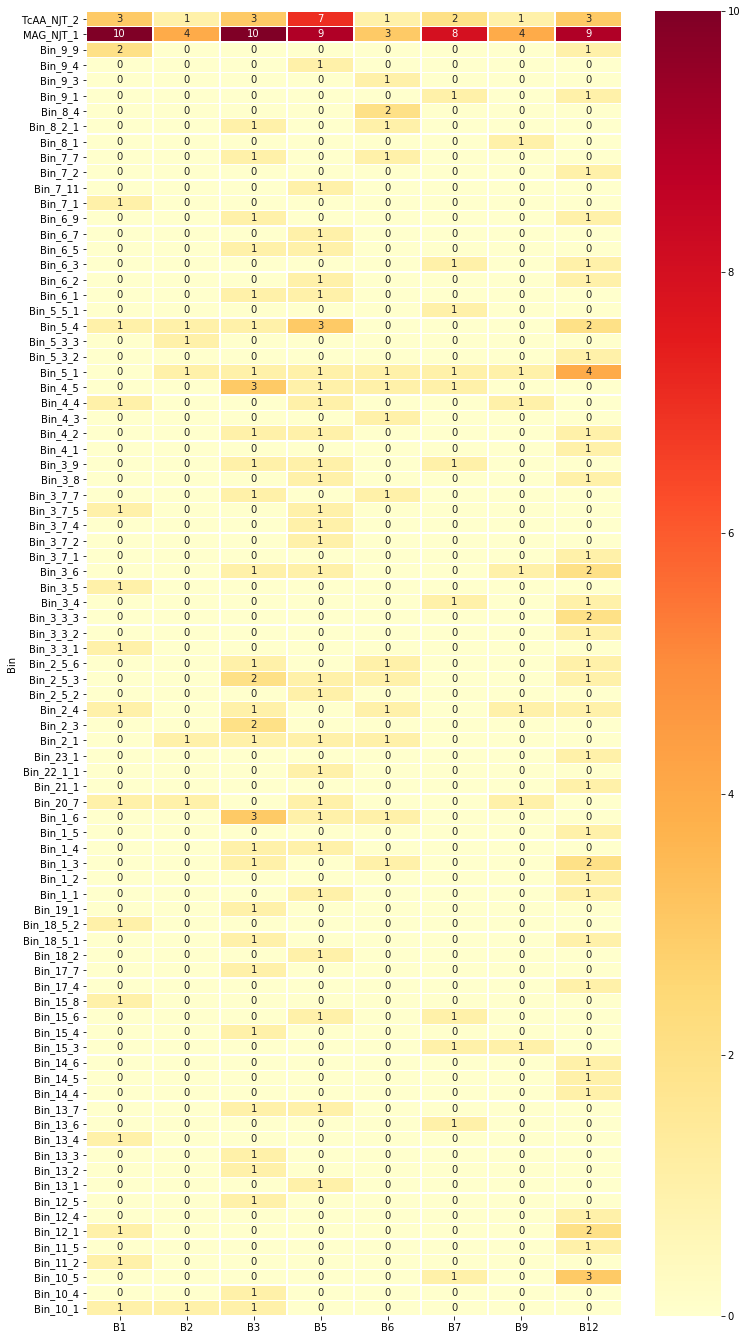

In [7]:
figsize = (12, 24)
fig, ax = plt.subplots(figsize=figsize)
sns.heatmap(final_table, ax=ax, linewidth=0.3, annot=True, cmap='YlOrRd')
plt.savefig('vitaminB_full.pdf')

In [8]:
min_table = final_table.copy()
min_table['total'] = min_table.sum(axis=1)
min_table = min_table[min_table['total'] > 2]
min_table = min_table.drop('total', axis=1)

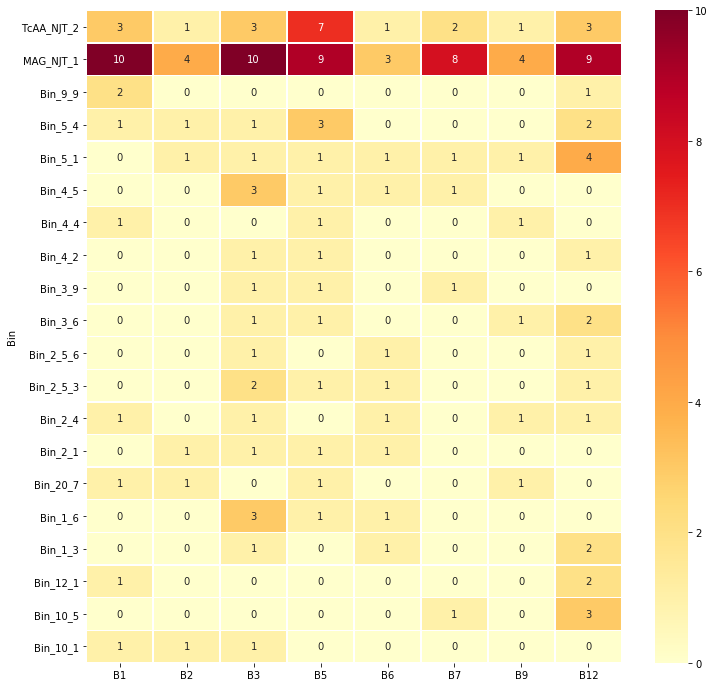

In [9]:
figsize = (12, 12)
fig, ax = plt.subplots(figsize=figsize)
sns.heatmap(min_table, ax=ax, linewidth=0.3, annot=True, cmap='YlOrRd')
plt.savefig('vitaminB_short.pdf')